In [40]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [41]:
# Read data and standardize
df = pd.read_csv('data/movie_data.csv', sep=';')
df = df[df['genres'].isin(['Action', 'Comedy', 'Drama'])]
for col in df.columns:
    if col == 'imdb_id':
        continue
    df[col] = df[col].fillna(df[col].mode()[0])
features = ['budget','popularity','production_companies','production_countries','revenue','runtime','spoken_languages','vote_average','vote_count']
x=df.loc[:,features].values
x=StandardScaler().fit_transform(x)

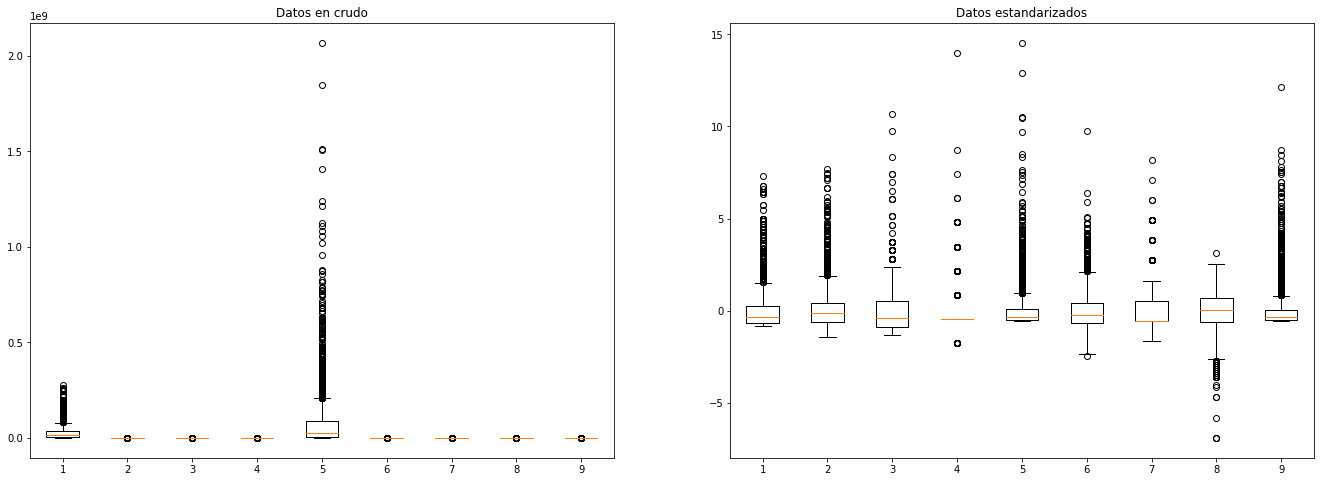

In [42]:
# Boxplots of normalized data before and after
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(23, 8))

ax[0].boxplot(df.loc[:,features].values)
ax[0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
ax[0].set_title("Datos en crudo")

ax[1].boxplot(x)
ax[1].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9])
ax[1].set_title("Datos estandarizados")
plt.show()

In [43]:
# First run to get the best number of components to use
pca=PCA(n_components=len(features))
PC = pca.fit_transform(x)
eigenvalues = pca.explained_variance_

print("Autovalores: {}".format(eigenvalues))

n_components = len(features)
for i in range(len(eigenvalues)):
    if sum(eigenvalues[:i+1])/sum(eigenvalues)>=0.95 and n_components > i+1:
        n_components=i+1
        break

Autovalores: [3.13336635 1.44440383 1.28269372 0.92175698 0.76021264 0.50430362
 0.45485507 0.29675325 0.20428689]


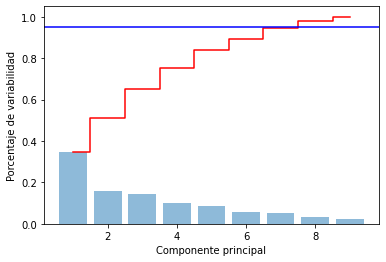

In [44]:
tot = sum(eigenvalues)
var_exp = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,len(features) + 1), var_exp, alpha=0.5, align='center')
plt.step(range(1,len(features) + 1), cum_var_exp, where='mid',color='red')
plt.axhline(y=0.95, color='b', linestyle='-')
plt.ylabel('Porcentaje de variabilidad')
plt.xlabel('Componente principal')
plt.show()

In [45]:
# Get the Yi functions
pca = PCA(n_components=n_components)
PC = pca.fit_transform(x)
principalDF = pd.DataFrame(data=PC,columns=['pc'+str(i) for i in range(1,n_components+1)])
finalDf = pd.concat([principalDF, df[['genres']]], axis = 1)
PCloadings = pca.components_.T * np.sqrt(pca.explained_variance_)
components = features
loadingdf = pd.DataFrame(PCloadings,columns=('Y'+str(i) for i in range(1,n_components+1)))
loadingdf["Variable"] = components
print(loadingdf[["Variable","Y1","Y2","Y3"]])

               Variable        Y1        Y2        Y3
0                budget  0.769326 -0.172599 -0.323312
1            popularity  0.766285 -0.107142 -0.018384
2  production_companies  0.388218  0.670072 -0.313856
3  production_countries  0.240815  0.795139 -0.211674
4               revenue  0.836545 -0.294062 -0.128217
5               runtime  0.365110  0.124542  0.636127
6      spoken_languages  0.232405  0.402698  0.267286
7          vote_average  0.343420  0.129412  0.736173
8            vote_count  0.860549 -0.202472 -0.004989


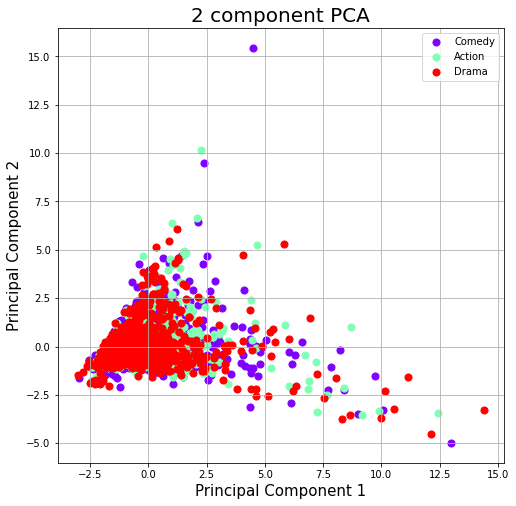

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df['genres'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(targets)))
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['genres'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [47]:
for i in range(len(loadingdf['Y1'])):
    if loadingdf.iloc[i]['Y1'] > 0:
        print("{} -> {} tiene una correlación POSITIVA".format(loadingdf.iloc[i]['Y1'], loadingdf.iloc[i]['Variable']))
    else:
        print("{} -> {} tiene una correlación NEGATIVA".format(loadingdf.iloc[i]['Y1'], loadingdf.iloc[i]['Variable']))

0.7693257874532069 -> budget tiene una correlación POSITIVA
0.7662850896451319 -> popularity tiene una correlación POSITIVA
0.38821816722748137 -> production_companies tiene una correlación POSITIVA
0.24081527128106067 -> production_countries tiene una correlación POSITIVA
0.8365447267063553 -> revenue tiene una correlación POSITIVA
0.36510984190134677 -> runtime tiene una correlación POSITIVA
0.2324050326897554 -> spoken_languages tiene una correlación POSITIVA
0.34341974249004853 -> vote_average tiene una correlación POSITIVA
0.8605489575162519 -> vote_count tiene una correlación POSITIVA


# Bar Plot de Componentes

Text(0.5, 1.0, 'Correlación de las variables con el primer componente principal')

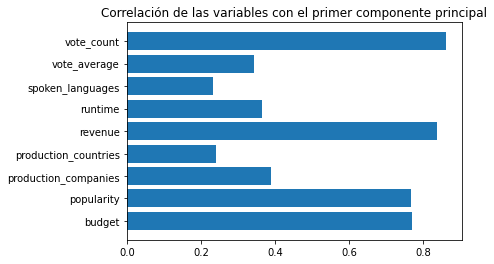

In [48]:
plt.barh(loadingdf['Variable'], loadingdf['Y1'])
plt.title("Correlación de las variables con el primer componente principal")

Text(0.5, 1.0, 'Correlación de las variables con la segunda componente principal')

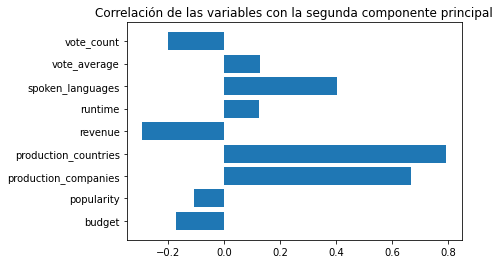

In [49]:
plt.barh(loadingdf['Variable'], loadingdf['Y2'])
plt.title("Correlación de las variables con la segunda componente principal")

Text(0.5, 1.0, 'Correlación de las variables con el tercer componente principal')

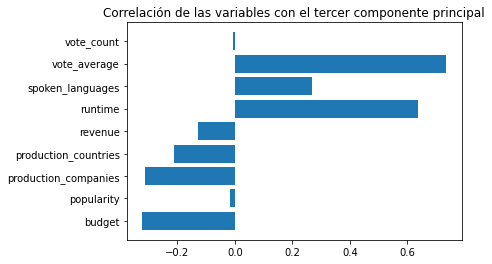

In [50]:
plt.barh(loadingdf['Variable'], loadingdf['Y3'])
plt.title("Correlación de las variables con el tercer componente principal")

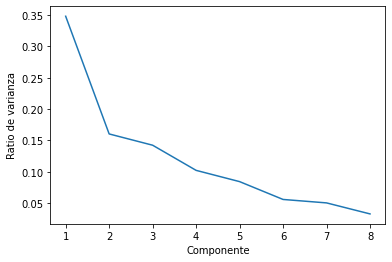

In [51]:
plt.plot(range(1,len(pca.components_)+1), pca.explained_variance_ratio_)
plt.ylabel("Ratio de varianza")
plt.xlabel("Componente")
plt.show()

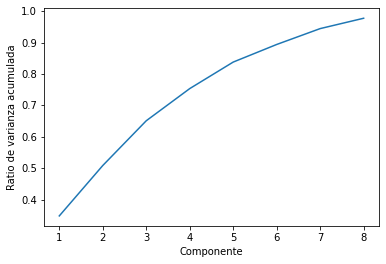

In [52]:
plt.plot(range(1,len(pca.components_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.ylabel("Ratio de varianza acumulada")
plt.xlabel("Componente")
plt.show()